In [1]:
import numpy as np
import os
import pandas as pd
from skimage.io import imread, imsave
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
er_trdat_path = './data/train/ER/'
nr_trdat_path = './data/train/NR/'
cropdat_path = './data/train/all_cropped/'

In [12]:
img = imread(er_trdat_path + '0.77978515625__CYGNO_60_40_ER_3_keV_930V_30cm_IDAO_iso_crop_hist_pic_run5_ev863;1.png')
img = img[192:384, 192:384]

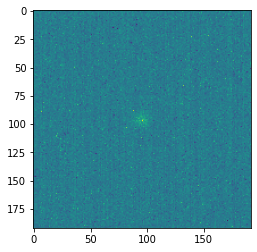

In [13]:
plt.imshow(img)

In [14]:
img

array([[101, 102, 103, ...,  98, 100, 102],
       [ 97, 101, 102, ..., 103,  98,  98],
       [ 97, 103, 102, ..., 103,  98,  99],
       ...,
       [100,  97, 100, ..., 100,  98, 102],
       [ 98, 101,  97, ..., 101, 100, 100],
       [102, 102,  98, ..., 104, 100, 101]], dtype=uint8)

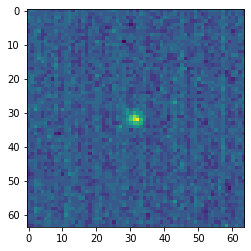

In [21]:
plt.imshow(img)

In [ ]:
%%time
i = 0
for filename in os.listdir(er_trdat_path):
    fn_parts = filename.split('_')
    ind =  fn_parts.index('ER')
    regr = fn_parts[ind+1]
    if regr not in {'1', '3', '6', '10', '20', '30'}:
        print(f'error fn_parts[7]')
        print(fn_parts)
        print(filename)
        break    
    img = imread(er_trdat_path + filename)    
    img = img[192:384, 192:384]
    #img = resize(img, (64, 64))
    img = img.astype(np.uint8)
    imsave(cropdat_path + f'{i}-ER-{regr}.png', img)
    i += 1
for filename in os.listdir(nr_trdat_path):
    fn_parts = filename.split('_')
    ind =  fn_parts.index('NR')
    regr = fn_parts[ind+1]
    if regr not in {'1', '3', '6', '10', '20', '30'}:
        print(f'error fn_parts[7]')
        print(fn_parts)
        print(filename)
        break    
    img = imread(nr_trdat_path + filename)
    img = img[192:384, 192:384]
    #img = resize(img, (64, 64))
    img = img.astype(np.uint8)
    imsave(cropdat_path + f'{i}-NR-{regr}.png', img)
    i += 1

In [ ]:
%%time
images = []
labels = []
for filename in os.listdir(cropdat_path):
    fn_parts = filename.split('-')
    label = fn_parts[1]
    img = Image.open(cropdat_path + filename)
    image = np.array(img)
    images.append(image.flatten())
    labels.append(label)
print(len(images))
print(len(labels))

In [ ]:
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=42)

In [ ]:
%%time
clf = svm.SVC()
clf.fit(train_images, train_labels)
clf.score(test_images,test_labels)